# Q1: Categorize numeric and categorical column of a DF

In [313]:
# import panda library
import pandas as pd

# define a custom function to categorize columns in a data frame
def find_type(df):
    num_type = []
    cat_type = []
    for name, type in df.dtypes.items():
        if type in ['float64', 'int64']:
            num_type.append(name)
        else:
            cat_type.append(name)

    return num_type, cat_type
        
       

In [315]:
import pandas as pd
# Import dataset ROA38 - Driving Tester Distribution (https://data.cso.ie/table/ROA38)
# Remove irrelevant columns
use_cols = [3, 5, 6, 7]
df_dtd = pd.read_csv('ROA38.csv', usecols = use_cols)
# df_dtd.head()

# Change the order of column as in the below
col_order = ['Month', 'Driving Test Centre', 'UNIT', 'VALUE']

# update the dataframe with column order
df_dtd = df_dtd[col_order]

#rename the value column with a meaningful name
df_dtd.rename(columns={"VALUE": "Driving Test Distribution"}, inplace = True)

# find the dtypes using custom function find_type
num_dtd, cat_dtd = find_type(df_dtd)

print('Numerical Columns are {}'.format(num_dtd))
print('Categorical Columns are {} \n'.format(cat_dtd))


Numerical Columns are ['Driving Test Distribution']
Categorical Columns are ['Month', 'Driving Test Centre', 'UNIT'] 



In [319]:
# Import dataset ROA36 - Driving Test Waiting Time (https://data.cso.ie/table/ROA36)
# Remove irrelevant columns
use_cols = [2, 3, 5, 6, 7]
df_dtwt = pd.read_csv('ROA36.csv', usecols = use_cols)

# Change the order of column as in the below
col_order = ['TLIST(M1)', 'Month', 'Driving Test Centre', 'UNIT', 'VALUE']

# update the dataframe with column order
df_dtwt = df_dtwt[col_order]

#rename the value column with a meaningful name
df_dtwt.rename(columns={"TLIST(M1)": "Period", "VALUE": "Driving Test Wait Time"}, inplace = True)

# find the dtypes using custom function find_type
num_dtwt, cat_dtwt = find_type(df_dtwt)

print('Numerical Columns are', num_dtwt)
print('Categorical Columns are', cat_dtwt)



Numerical Columns are ['Period', 'Driving Test Wait Time']
Categorical Columns are ['Month', 'Driving Test Centre', 'UNIT']


# Q2.1 - Concatenate 2 Dataset

In [322]:
# Function to concate two dataset
def concat_df(df1, df2):
    concat_df = pd.concat([df1, df2]) 
    return concat_df
    
    

In [489]:
# call the custom function to concate dataset
# pass 2 dataset and get the resultant dataset

df_concat = concat_df(df_dtd, df_dtwt)

# remove the duplicated records by using function drop_duplicates
df_concat = df_concat.drop_duplicates()

#Find the row and column count
row_count, col_count = df_concat.shape

#print row and column count

print('Number of rows in the concatenated dataset:', row_count)
print('Number of columns in the concatenated dataset:', col_count)


Number of rows in the concatenated dataset: 3944
Number of columns in the concatenated dataset: 6


# Q2.2 - Calculate correlation matrix using NumPy

In [703]:
import numpy as np

# Dataset - World Happiness Report 2023
df_happy = pd.read_csv('WHR2023.csv')

# Select only numeric coloumns
num_col = df_happy.select_dtypes(include='number')

# Calculate correlation matrix for all number coloumns.
corr_matrix = np.corrcoef(num_col)
print(corr_matrix)

[[1.         0.99998757 0.99995077 ... 0.99830468 0.99717496 0.9969584 ]
 [0.99998757 1.         0.99996771 ... 0.99847532 0.99744715 0.99721793]
 [0.99995077 0.99996771 1.         ... 0.99876945 0.99776073 0.99759052]
 ...
 [0.99830468 0.99847532 0.99876945 ... 1.         0.99972534 0.99977267]
 [0.99717496 0.99744715 0.99776073 ... 0.99972534 1.         0.99994855]
 [0.9969584  0.99721793 0.99759052 ... 0.99977267 0.99994855 1.        ]]


In [705]:
# Find pair of columns with highest correlation coefficient and their names

# Initialize variables
highest_corr = 0
highest_corr_pair = None

# Find the number of columns
col_len = len(num_col.columns)

#Loop the first column name 
for i in range(col_len):
    col1 = num_col.columns[i]
    # print('1: ', col1)
    
    for j in range(i+1, col_len):
        col2 = num_col.columns[j]  
        # print('2: ', col2)
        
        # Find correlation between two columns
        corr_coef = np.corrcoef(num_col[col1], num_col[col2])[0,1] 
        # print(corr_coef)

        # Find highest correlation coefficient and it's pair
        if corr_coef > highest_corr:
            highest_corr = corr_coef
            highest_corr_pair = (col1, col2)

print('Columns with Highest Correlation Coefficient is:', highest_corr_pair, 'with Correlation Coefficient of:', highest_corr)
  

Columns with Highest Correlation Coefficient is: ('Ladder score', 'Social support') with Correlation Coefficient of: 0.8345316508727755


# Q3 - Find Mean, Min, Max of 1000 random numbers using NumPy array

In [484]:
#Generate NumPy array for 1000 numbers
num = np.arange(1,1001,1)

#Shape array with 5 columns
arr = np.reshape(num, (200, 5))

#Calculate mean of 5 consecutive numbers
mean = np.mean(arr, axis=1) #axis = 1 will find mean for each row
print('Mean Value of Each Row:\n', mean)

#Find the min number in each row
min = np.min(arr, axis=1)
print('Minimum Value in Each Row:\n', min)

#Find the max number in each row
max = np.max(arr, axis=1)
print('Maximum Value in Each Row:\n', max)

#Find the max number comparing the min and max array
max_value = np.maximum(np.abs(max), np.abs(min))
print('Abs Max comparing Max and Min:\n', max_value)


Mean Value of Each Row:
 [  3.   8.  13.  18.  23.  28.  33.  38.  43.  48.  53.  58.  63.  68.
  73.  78.  83.  88.  93.  98. 103. 108. 113. 118. 123. 128. 133. 138.
 143. 148. 153. 158. 163. 168. 173. 178. 183. 188. 193. 198. 203. 208.
 213. 218. 223. 228. 233. 238. 243. 248. 253. 258. 263. 268. 273. 278.
 283. 288. 293. 298. 303. 308. 313. 318. 323. 328. 333. 338. 343. 348.
 353. 358. 363. 368. 373. 378. 383. 388. 393. 398. 403. 408. 413. 418.
 423. 428. 433. 438. 443. 448. 453. 458. 463. 468. 473. 478. 483. 488.
 493. 498. 503. 508. 513. 518. 523. 528. 533. 538. 543. 548. 553. 558.
 563. 568. 573. 578. 583. 588. 593. 598. 603. 608. 613. 618. 623. 628.
 633. 638. 643. 648. 653. 658. 663. 668. 673. 678. 683. 688. 693. 698.
 703. 708. 713. 718. 723. 728. 733. 738. 743. 748. 753. 758. 763. 768.
 773. 778. 783. 788. 793. 798. 803. 808. 813. 818. 823. 828. 833. 838.
 843. 848. 853. 858. 863. 868. 873. 878. 883. 888. 893. 898. 903. 908.
 913. 918. 923. 928. 933. 938. 943. 948. 953. 958. 9

# Q4 - Connect to MySQL DB and create a table and maintain data

In [541]:
import mysql.connector

 
# Connecting to mysql server
conn = mysql.connector.connect(user = 'root',
                               host = 'localhost',
                                port = '3306',
                               password='Name@1234',
                              database = 'zsan')
 
# print(conn)

# Get the cursor for DB connection
mycursor = conn.cursor()

#Create a database named ZSAN.
# mycursor.execute("CREATE DATABASE ZSAN")

# Display All database
mycursor.execute("SHOW DATABASES")
for x in mycursor:
  print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('zsan',)


In [543]:
# Create a table named 'student'
mycursor.execute("CREATE TABLE IF NOT EXISTS STUDENT (id INT(3), name VARCHAR(45), class VARCHAR(45), subject VARCHAR(45))")

# Display all the tables
mycursor.execute("SHOW TABLES")

# Loop all table names and print
for x in mycursor:
  print(x)

('student',)
('zsan1',)


In [547]:
# Insert a record into table 

mycursor.execute("INSERT INTO student (ID, Name, Class, Subject) VALUES (3, 'Maria', 'UG', 'Civil')")
conn.commit()

In [549]:
# Select the records
mycursor.execute("SELECT * from student")
tab = mycursor.fetchall()

# Loop all the records and print
for line in tab:
    print(line)

(1, 'Santhosh', 'PG', 'AI')
(2, 'John', 'PG', 'Data Science')
(3, 'Maria', 'UG', 'Civil')


# Q5 - EDA on Iris Dataset

In [677]:
# import the IRIS dataset and display first 5 records

df_iris = pd.read_csv('iris.csv')
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [679]:
# display the shape of dataset
df_iris.shape

(150, 5)

In [681]:
# display the data types of Iris dataset
df_iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [683]:
# display count for missing values in each column. 
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [685]:
# holistic overview of the data's in the dataset
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [687]:
# list out the unique values in the target variable which is 'Species'
print('Unique Values of Target Variable "Species" are:', df_iris['Species'].unique())

Unique Values of Target Variable "Species" are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

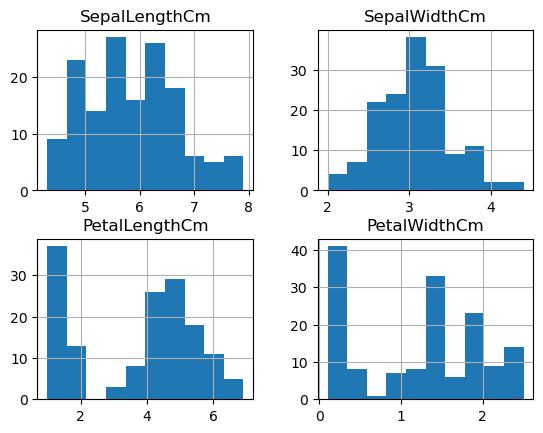

In [715]:
# Histogram plot using Pandas
df_iris_ip.hist()

<Axes: >

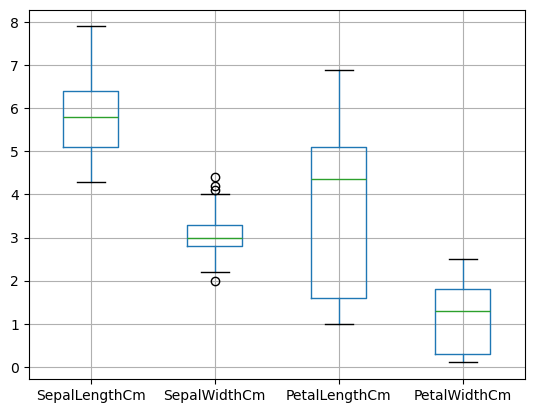

In [707]:
# Box plot using Pandas library
df_iris_ip.boxplot()

In [693]:
# Correlation Matrix for Input/Feature columns

iris_corr = np.corrcoef(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], rowvar=False)
print(iris_corr)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [713]:
# # Histogram using matplot library
# import matplotlib.pyplot as plt

# df_iris_ip = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# lab = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# plt.hist(df_iris_ip, density = True, histtype = 'bar', label = lab)
# plt.legend()
# plt.show()



In [709]:
# # Boxplots using matplot library

# #adding label to each column
# # lab = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# fig = plt.boxplot(df_iris_ip, labels = lab)